In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

# 1. Data Preparation
Download the MNIST dataset directly from the official TensorFlow website and decompress it.

In [3]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data() 

# Inspet the Datasets
print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)
#plt.imshow(x_train_raw[0])

#Convert the labels into one-hot codes.
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In the MNIST dataset, the images are a tensor in the shape of [60000, 28, 28]. The first dimension is used to extract images, and the second and third dimensions are used to extract pixels in each image. Each element in this tensor indicates the strength of a pixel in an image. The value ranges from 0 to 255.
Label data is converted from scalar to one-hot vectors. In a one-hot vector, one digit is 1, and digits in other dimensions are all 0s. For example, label 1 may be represented as [0,1,0,0,0,0,0,0,0,0,0,0]. Therefore, the labels are a digital matrix of [60000, 10].


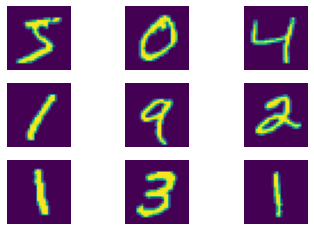

In [4]:
#Draw the first 9 images
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    #plt.ylabel(y[i].numpy())
    plt.axis('off')
plt.show()


An output of a **fully connected network** must be in the form of **vector**, instead of the matrix form of the current images. Therefore, you need to sort the images into vectors as follows:

In [5]:
#Convert a 28 x 28 image into a 784 x 1 vector.
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

### Q: What if we wanted to work with images instead?
Answer: Use of Different Network Architecture

Currently, the dynamic range of pixels is 0 to 255. Image pixels are usually normalized to the range of 0 to 1 during processing of image pixel values.

In [6]:
#Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


# 2. Model Definition
## 2.1 Model Architecture

In [7]:
#Create a deep neural network (DNN) model that consists of three layers 
#layer.Dense() indicates a fully connected layer, and activation indicates a used activation function.
model = keras.Sequential([ 
    layers.Dense(512, activation='relu', input_dim = 784),
    layers.Dense(256, activation='relu'),
    layers.Dense(124, activation='relu'),
layers.Dense(num_classes, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 124)               31868     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1250      
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


## 2.2 Model Compilation (Optimizer & Loss Function)

In [8]:
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Optimizer,
              metrics=['accuracy'])


# 3. Model Training

In [9]:
#Fit the training data to the model by using the fit method.
#Epoch indicates a specific round of training. In this example, full data is iterated for 10 times.
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1)


Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2308 - accuracy: 0.9314
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0820 - accuracy: 0.9747
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0530 - accuracy: 0.9829
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0396 - accuracy: 0.9870
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0300 - accuracy: 0.9905
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0270 - accuracy: 0.9909
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0228 - accuracy: 0.9924
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0214 - accuracy: 0.9927
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0159 - accuracy: 0.9945
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0147 - accuracy: 0.9948

# 4. Model Evaluation

In [10]:
# Evaluating the DNN model. 
# The evaluation shows that the model accuracy reaches 0.87, and 10 training iterations have been performed.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.08391162008047104
Test accuracy: 0.9779999852180481


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
prediction results of the first 20 images:
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
first 20 images in the test set:


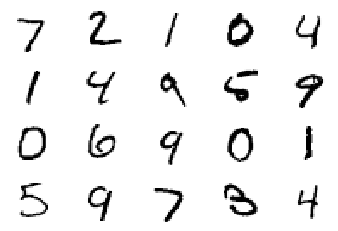

In [11]:
#Visualize test set output results.
import matplotlib.pyplot as plt
%matplotlib inline
def res_Visual(n):
    final_opt_a=model.predict_classes(x_test[0:n])#Perform predictions on the test set by using the model.
    fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
    ax = ax.flatten()
    print('prediction results of the first {} images:'.format(n))
    for i in range(n):
        print(final_opt_a[i],end=',')
        if int((i+1)%5) ==0:
            print('\t')
        #Visualize image display.
        img = x_test[i].reshape((28,28))#Read each row of data in the format of Ndarry.
        plt.axis("off")
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')#Visualization
        ax[i].axis("off")
    print('first {} images in the test set:'.format(n))
res_Visual(20)
